In [1]:
from sklearn_extra.cluster import KMedoids
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('air.csv')

# DATA ANALYSIS
Using data mining techniques to explore the data 

### Check dimensions
The output show that we are working with 129,880 rows and 24 columns

In [3]:
data.shape

(129880, 24)

### Check variables data types
Column variables are encoded as numeric data types (int and floats)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
data.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


### Check first 10 rows

In [6]:
data.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


### Check Last 10 rows

In [7]:
data.tail(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129870,129871,Female,23,First-time,Business,Business,337,46,58.0,2,...,2,5,1,5,5,4,2,5,4,Neutral or Dissatisfied
129871,129872,Female,32,Returning,Business,Economy Plus,337,0,1.0,2,...,5,4,1,4,4,1,4,4,3,Satisfied
129872,129873,Female,44,Returning,Personal,Economy Plus,308,0,22.0,4,...,3,4,3,5,5,3,3,3,3,Neutral or Dissatisfied
129873,129874,Female,28,Returning,Personal,Economy Plus,337,0,0.0,2,...,1,3,5,3,3,4,4,3,3,Neutral or Dissatisfied
129874,129875,Female,55,Returning,Personal,Economy Plus,308,0,0.0,4,...,4,3,3,4,2,4,3,4,4,Neutral or Dissatisfied
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


### Statistical Summary

In [8]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Check for missing values

In [9]:
print(data.isnull().sum())

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

### Check for Duplicated rows

In [10]:
print("Number of Duplicated rows:",data.duplicated().sum())

Number of Duplicated rows: 0


### Identify relationships between columns
we can observe that as variety of instruments increase, number of hits song increses

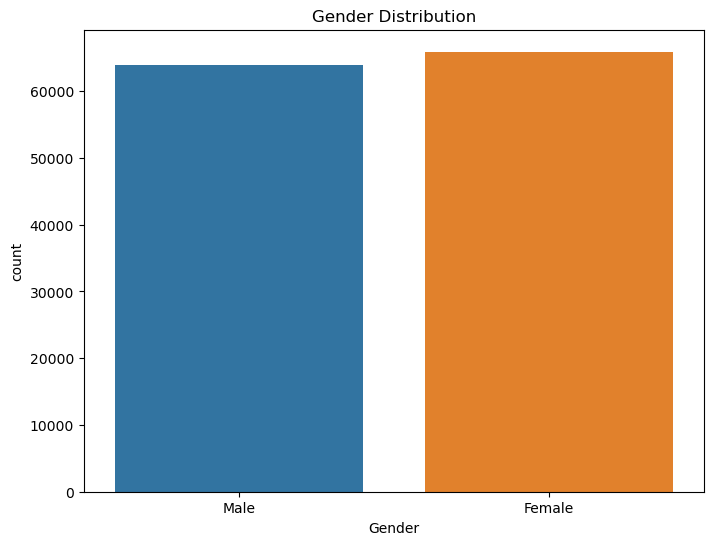

In [11]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

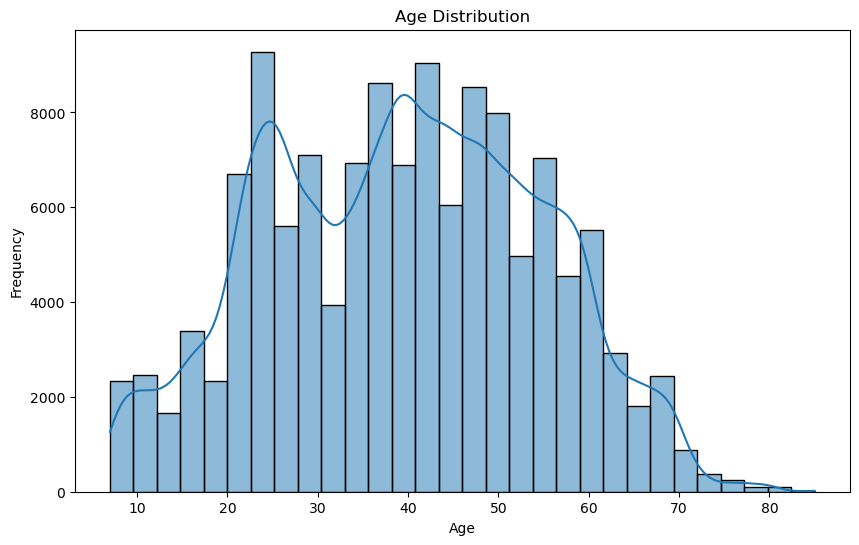

In [12]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

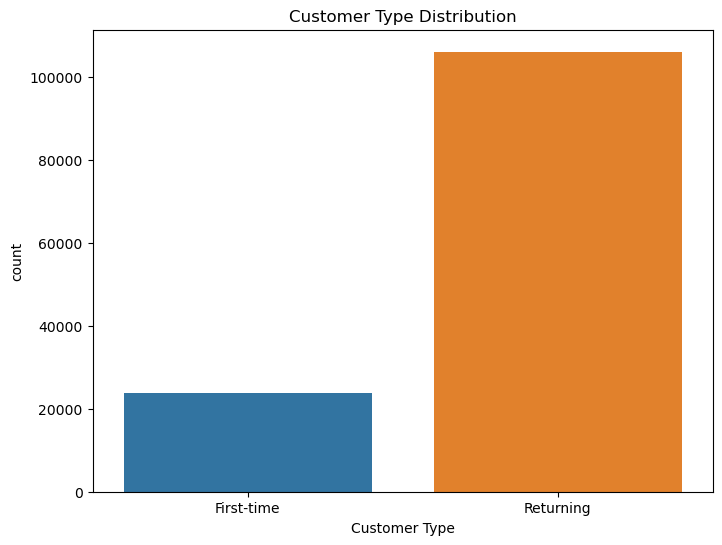

In [13]:
# Customer type distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Type', data=data)
plt.title('Customer Type Distribution')
plt.show()

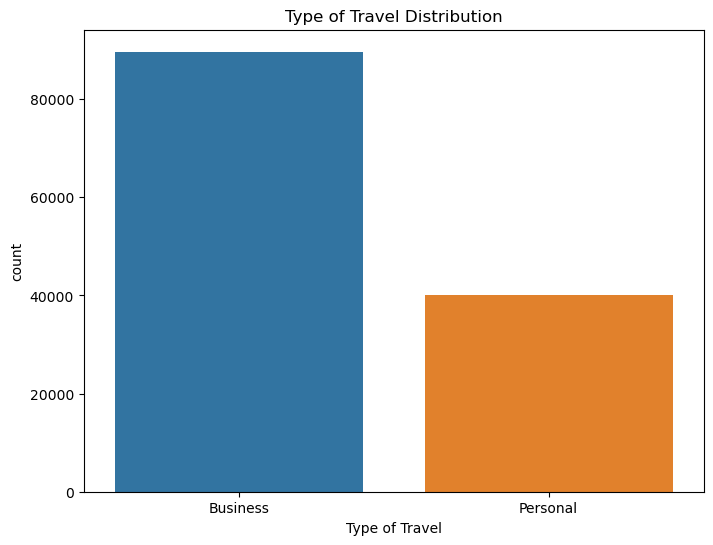

In [14]:
# Type of travel distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Type of Travel', data=data)
plt.title('Type of Travel Distribution')
plt.show()

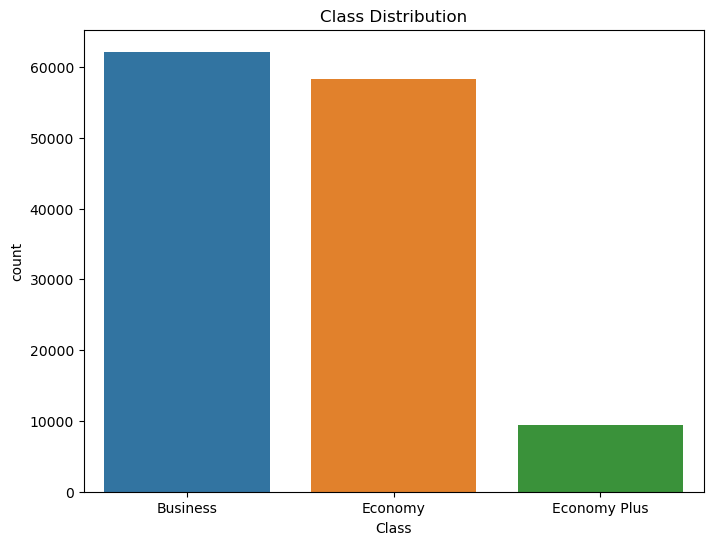

In [15]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

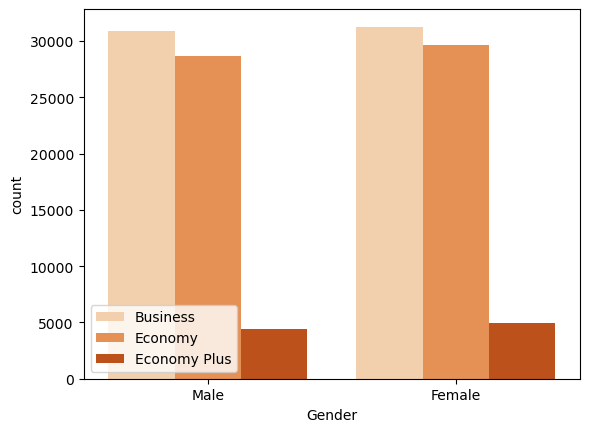

In [16]:
sns.countplot(x="Gender", data=data, palette="Oranges", hue="Class")
plt.legend(loc=3)
plt.show()

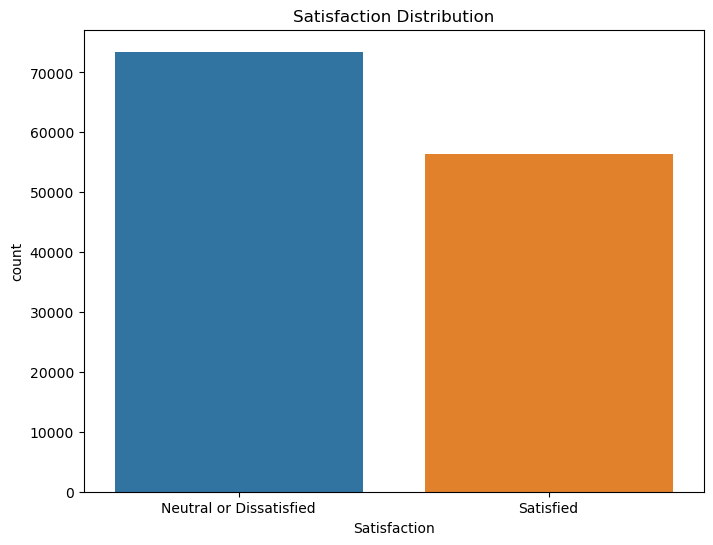

In [17]:
# Satisfaction distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Satisfaction', data=data)
plt.title('Satisfaction Distribution')
plt.show()

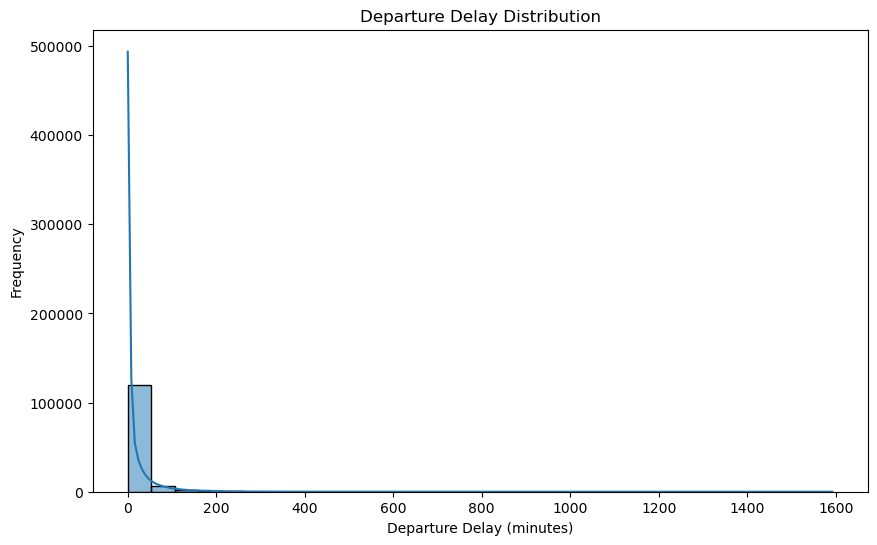

In [18]:
# Departure delay distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Departure Delay'], bins=30, kde=True)
plt.title('Departure Delay Distribution')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

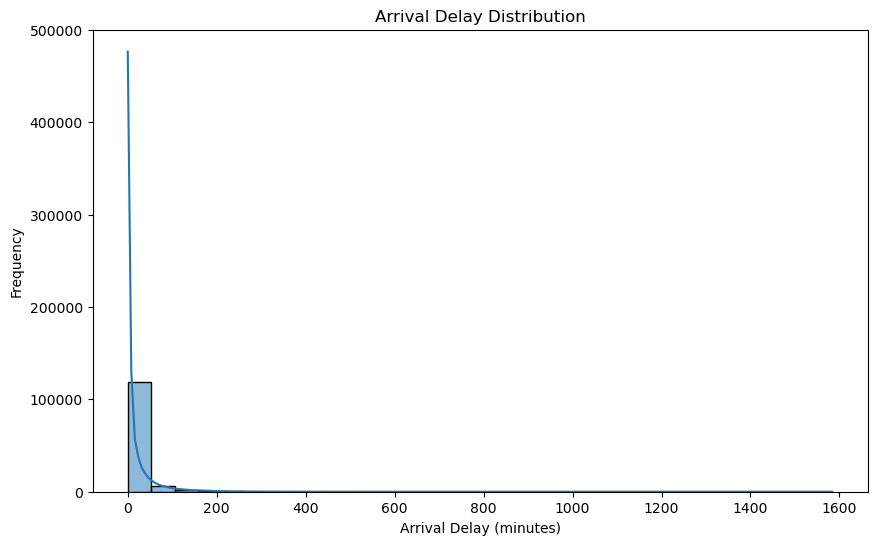

In [19]:
# Arrival delay distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Arrival Delay'].dropna(), bins=30, kde=True)
plt.title('Arrival Delay Distribution')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

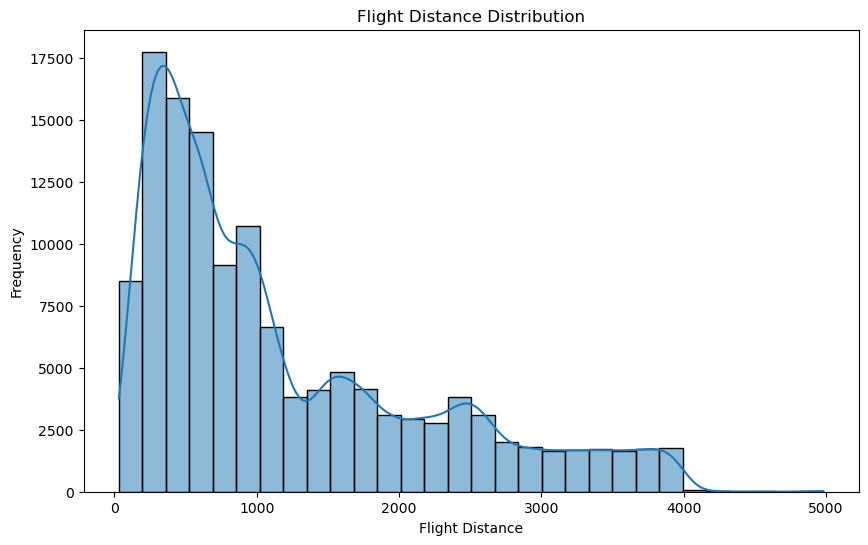

In [20]:
#Flight distance distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Flight Distance'], bins=30, kde=True)
plt.title('Flight Distance Distribution')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

# 

# Data Cleaning
Cleaning the data from any errors or inconsistencies and handling missing or
duplicate values.


### Delete rows containing missing values
we can see that about 393 rows are deleted

In [21]:
data = data.dropna()
print(data.shape)

(129487, 24)


### Delete duplicated rows

In [22]:
data = data.drop_duplicates()
print(data.shape)

(129487, 24)


# Extra Operations on Data (Bonus)

### Divide Data
split data by numerical and categorical columns

In [23]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Number of Numerical Column: ",len(numerical_cols))
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Number of Categorical Column: ",len(categorical_cols))

Number of Numerical Column:  19
Number of Categorical Column:  5


### Standardize numerical variables
Standardize to have a mean of 0 and a standard deviation of 1 to ensure they contribute equally to the clustering process.

### dataset not biased, no overfitting

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
stnd = scaler.fit_transform(data[numerical_cols])
print(stnd)

[[-1.73267445  0.56697318 -0.37011481 ...  0.20422039  1.23070131
   1.15934237]
 [-1.73264778 -0.29295518 -0.37011481 ... -0.548095    1.23070131
   1.15934237]
 [-1.7326211   0.10393483 -0.33803645 ...  0.95653579 -0.26838688
  -0.53546117]
 ...
 [ 1.73166963  0.17008317 -0.85530007 ... -0.548095   -0.26838688
   1.15934237]
 [ 1.7316963   0.69926985 -0.85530007 ...  1.70885118 -0.26838688
   1.15934237]
 [ 1.73172298 -1.28518021 -0.85530007 ...  0.20422039 -1.01793097
  -2.2302647 ]]


### Encoding
convert categorical variables into binary variables (members or nonmembers)

In [26]:
encoded_data = pd.get_dummies(data[categorical_cols])
print(encoded_data)

        Gender_Female  Gender_Male  Customer Type_First-time  \
0               False         True                      True   
1                True        False                     False   
2               False         True                     False   
3               False         True                     False   
4                True        False                     False   
...               ...          ...                       ...   
129875          False         True                     False   
129876          False         True                     False   
129877          False         True                     False   
129878          False         True                     False   
129879           True        False                     False   

        Customer Type_Returning  Type of Travel_Business  \
0                         False                     True   
1                          True                     True   
2                          True                    

### Random sample of data

In [27]:
random_sample = data.sample(n=5000)  # Selecting 5k random rows

### Retrieve best and worst reviews based on customer satisfaction 
sort data by [Satisfaction] column

In [28]:
criteria_column = 'Satisfaction' 

In [29]:
sorted_df = data.sort_values(by=criteria_column, ascending=False)

In [30]:
top_10_reviews = sorted_df.head(10)
worst_10_reviews = sorted_df.tail(10)

##### divide data based on numerical and categorical columns

In [31]:
best_numerical_data = top_10_reviews[numerical_cols]
best_categorical_data = top_10_reviews[categorical_cols]

In [32]:
worst_numerical_data = worst_10_reviews[numerical_cols] 
worst_categorical_data = worst_10_reviews[categorical_cols]  

# Kmedoids

### Random Data
applying kmedoids on the random sample of data and extract labels of each point

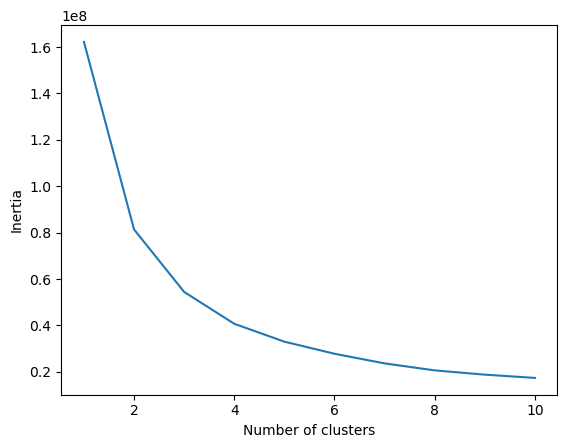

In [33]:
inertia = [] # tightness of clusters
for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(random_sample[numerical_cols]) #standard data
    inertia.append(kmedoids.inertia_)

# Plot elbow curve to visualize the optimal k
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From the curve, choose the optimal k value 
#(the point where the inertia starts)
#from k=2 till k=4

In [34]:
k = 3  # Number of clusters
kmedoids = KMedoids(n_clusters=k)
kmedoids.fit(random_sample[numerical_cols])

# Get cluster labels
cluster_labels = kmedoids.labels_

# Add cluster labels to the DataFrame
random_sample['Cluster'] = cluster_labels

# Print cluster assignments
print(random_sample[['ID','Cluster']])

            ID  Cluster
128525  128526        2
58887    58888        1
68854    68855        1
104729  104730        2
126235  126236        2
...        ...      ...
13939    13940        0
7913      7914        0
84784    84785        1
120476  120477        2
31275    31276        0

[5000 rows x 2 columns]


#### iterate over clusters and examine the data points within each cluster


In [35]:
# Iterate over each cluster label
for cluster_label in range(k):
    # Filter the DataFrame for rows with the current cluster label
    cluster_data = random_sample[random_sample['Cluster'] == cluster_label]
    
    # Print the rows of the current cluster
    print(f"Cluster {cluster_label}:\n")
    print(cluster_data["ID"])
    print("\n")


Cluster 0:

39862    39863
33644    33645
9801      9802
7149      7150
6970      6971
         ...  
24279    24280
23528    23529
13939    13940
7913      7914
31275    31276
Name: ID, Length: 1673, dtype: int64


Cluster 1:

58887    58888
68854    68855
77087    77088
77121    77122
59899    59900
         ...  
45648    45649
81061    81062
47505    47506
78458    78459
84784    84785
Name: ID, Length: 1676, dtype: int64


Cluster 2:

128525    128526
104729    104730
126235    126236
108027    108028
93104      93105
           ...  
112611    112612
115854    115855
104692    104693
110003    110004
120476    120477
Name: ID, Length: 1651, dtype: int64




#### print number of points assigned to each cluster

In [36]:
# Get the counts of points assigned to each cluster
cluster_counts = random_sample['Cluster'].value_counts()

# Print the number of points assigned to each cluster
print("Number of points assigned to each cluster:")
print(cluster_counts)


Number of points assigned to each cluster:
Cluster
1    1676
0    1673
2    1651
Name: count, dtype: int64


#### BEST REVIEWS
PERFORM K-MEDOIDS ON THE BEST 10 REVIEWS and extracts cluster labels and centers

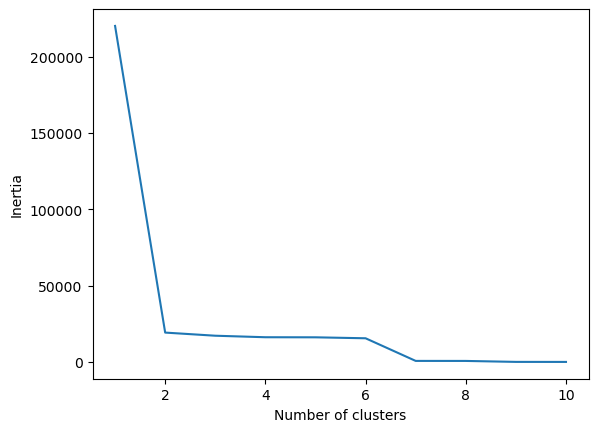

In [37]:
inertia = [] # tightness of clusters
for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(best_numerical_data) #standard data
    inertia.append(kmedoids.inertia_)

# Plot elbow curve to visualize the optimal k
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From the curve, choose the optimal k value 
#(the point where the inertia starts)
#from k=6 till k=7

In [38]:
k = 6 # Number of clusters
kmedoids = KMedoids(n_clusters=k)
kmedoids.fit(best_numerical_data)

# Get cluster labels
cluster_labels = kmedoids.labels_

# Add cluster labels to the DataFrame
best_numerical_data['Cluster'] = cluster_labels

# Print cluster assignments
print(best_numerical_data['Cluster'])

64971     5
101255    0
101253    0
101251    0
50141     3
50142     4
101246    0
50151     5
50153     2
50155     1
Name: Cluster, dtype: int64


#### print number of points assigned to each cluster

In [39]:
# Get the counts of points assigned to each cluster
cluster_counts = best_numerical_data['Cluster'].value_counts()

# Print the number of points assigned to each cluster
print("Number of points assigned to each cluster:")
print(cluster_counts)

Number of points assigned to each cluster:
Cluster
0    4
5    2
3    1
4    1
2    1
1    1
Name: count, dtype: int64


#### WORST REVIEWS
PERFORM K-MEDOIDS ON THE WORST 10 REVIEWS and extracts cluster labels and centers

In [40]:
k = 5  # Number of clusters
kmedoids = KMedoids(n_clusters=k)
kmedoids.fit(worst_numerical_data)

# Get cluster labels
cluster_labels = kmedoids.labels_

# Add cluster labels to the DataFrame
worst_numerical_data['Cluster'] = cluster_labels
cluster = kmedoids.cluster_centers_


# Print cluster assignments
print(worst_numerical_data['Cluster'])



54475     1
54496     1
54494     1
54493     3
54492     0
54487     2
54485     1
54481     0
54477     4
129879    3
Name: Cluster, dtype: int64


#### print number of points assigned to each cluster

In [41]:
# Get the counts of points assigned to each cluster
cluster_counts = worst_numerical_data['Cluster'].value_counts()

# Print the number of points assigned to each cluster
print("Number of points assigned to each cluster:")
print(cluster_counts)


Number of points assigned to each cluster:
Cluster
1    4
3    2
0    2
2    1
4    1
Name: count, dtype: int64


## Hierarchical

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [43]:
from scipy.cluster.hierarchy import fcluster

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

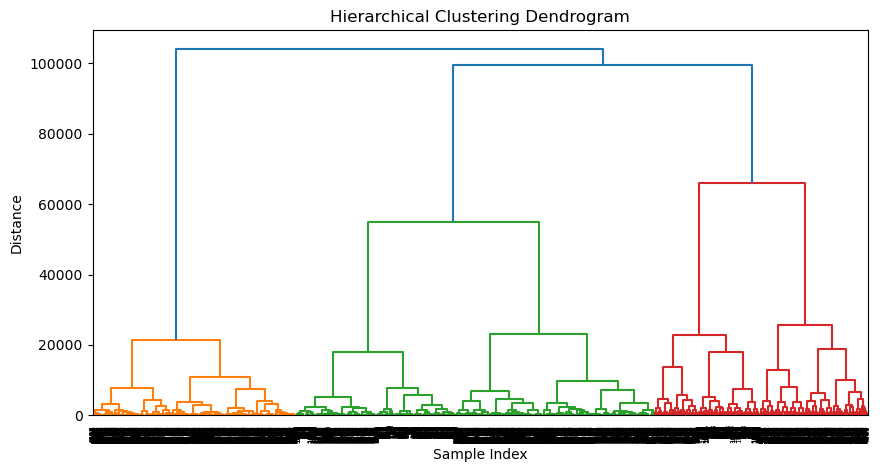

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy



# Compute the hierarchical clustering
Z = hierarchy.linkage(data[numerical_cols].iloc[1:5000,:], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


#### Hierarchical on the best 10 reviews

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z1 = linkage(best_numerical_data, method='single', metric='euclidean') # minimum
Z2 = linkage(best_numerical_data, method='complete', metric='euclidean') # maximum
Z3 = linkage(best_numerical_data, method='average', metric='euclidean') # average
Z4 = linkage(best_numerical_data, method='ward', metric='euclidean') # variance



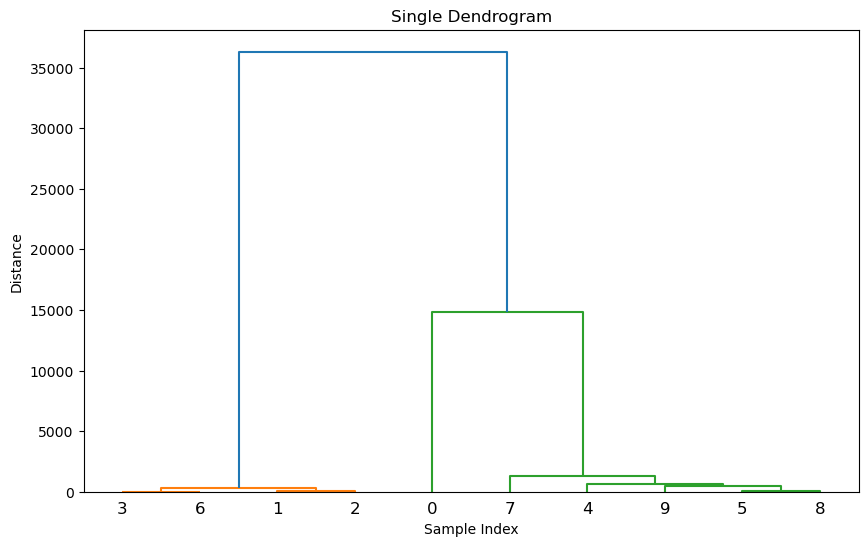

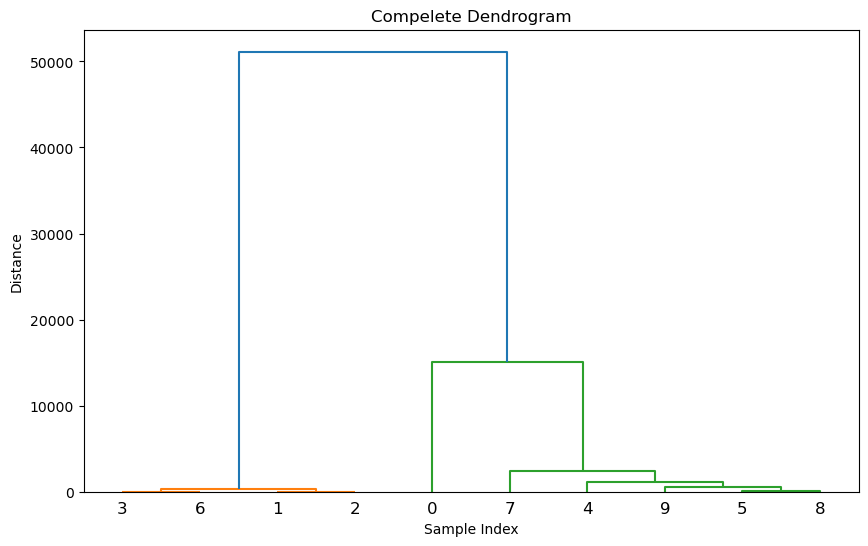

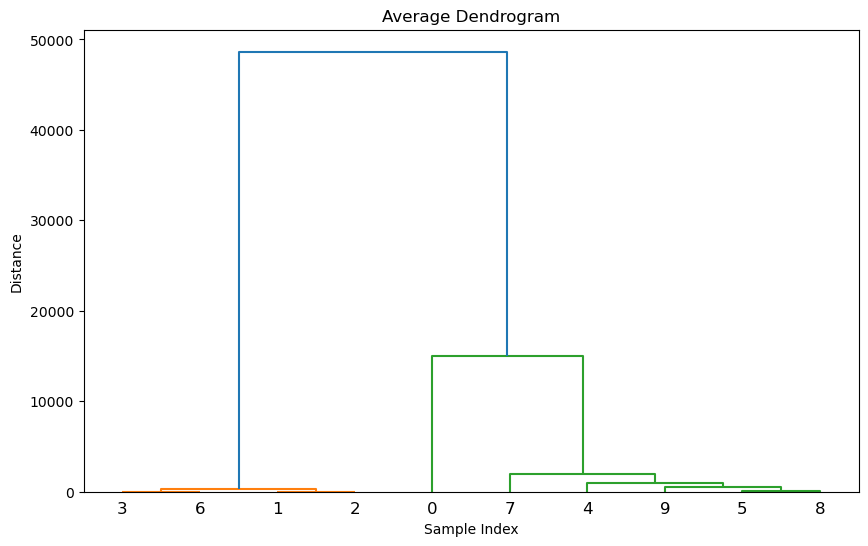

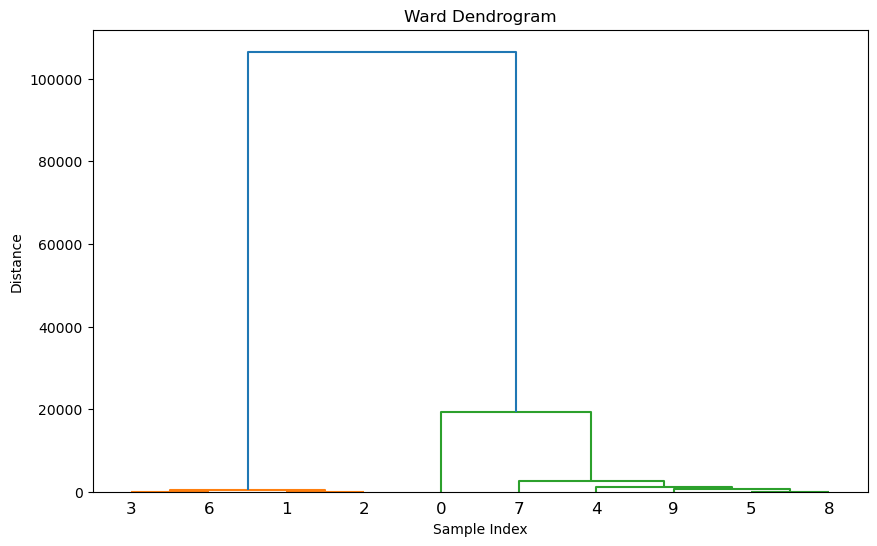

In [47]:

plt.figure(figsize=(10, 6))
dendrogram(Z1)
plt.title('Single Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram(Z2)
plt.title('Compelete Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram(Z3)
plt.title('Average Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram(Z4)
plt.title('Ward Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#### Hierarchical on the worst 10 reviews

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z1 = linkage(worst_numerical_data, method='single', metric='euclidean') # minimum
Z2 = linkage(worst_numerical_data, method='complete', metric='euclidean') # maximum
Z3 = linkage(worst_numerical_data, method='average', metric='euclidean') # average
Z4 = linkage(worst_numerical_data, method='ward', metric='euclidean') # variance
labelList = list(best_categorical_data['Satisfaction'])


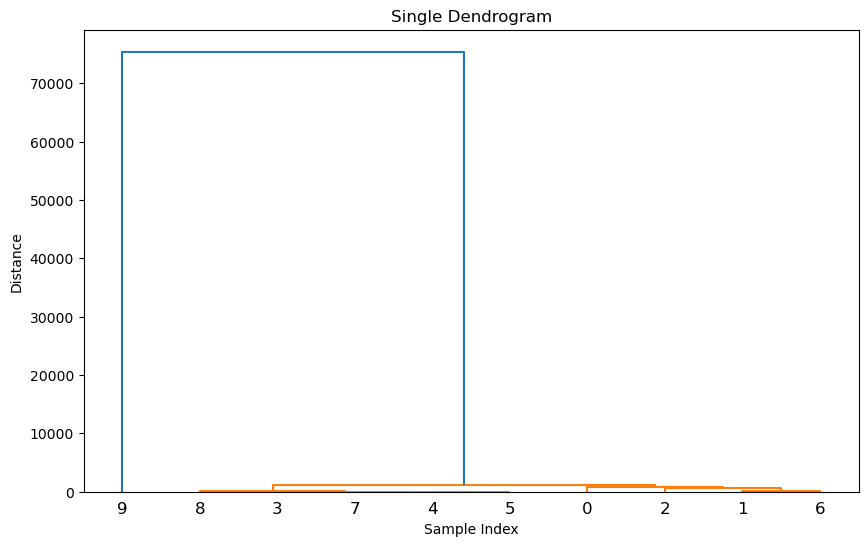

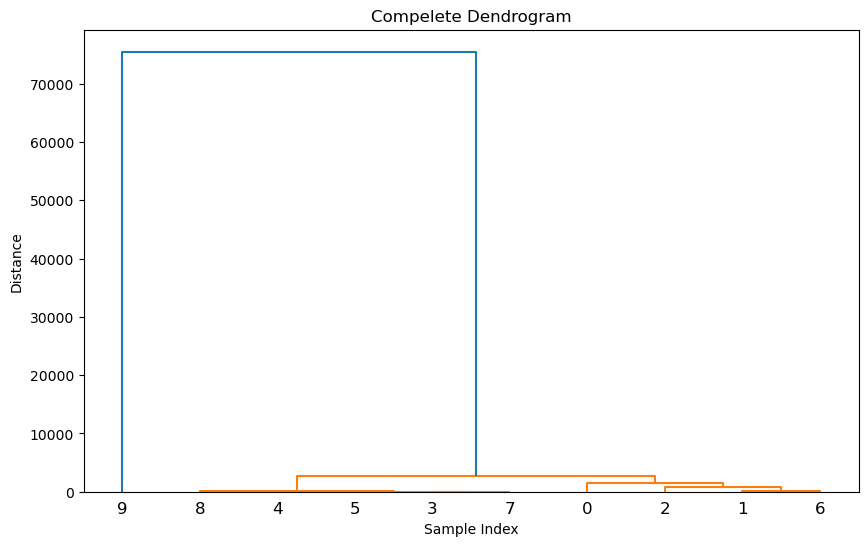

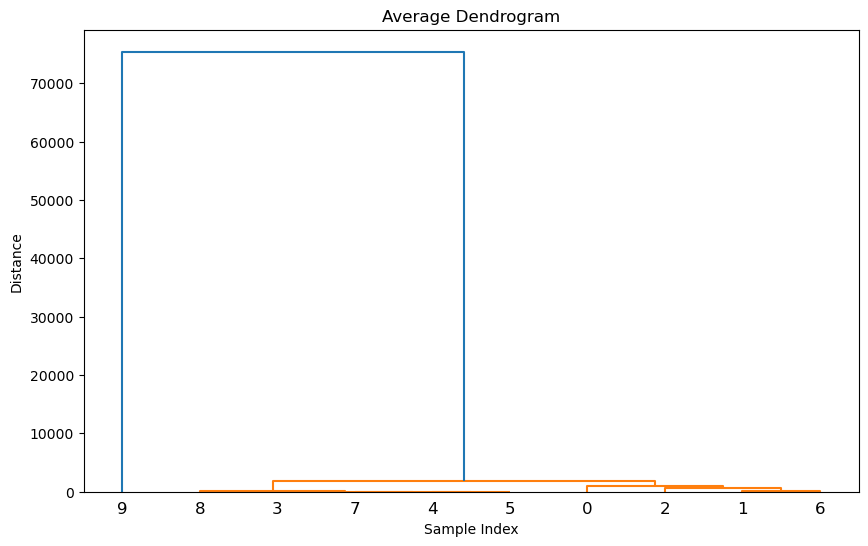

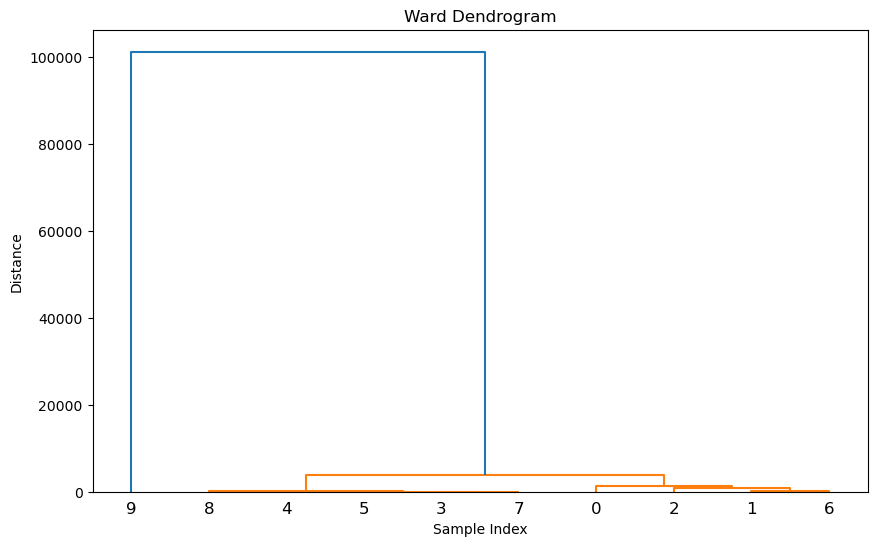

In [49]:

plt.figure(figsize=(10, 6))
dendrogram(Z1)
plt.title('Single Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram(Z2)
plt.title('Compelete Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram(Z3)
plt.title('Average Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram(Z4)
plt.title('Ward Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### specify satisfaction labels using hierarchical
(not recommended)

instead, use fuzzy

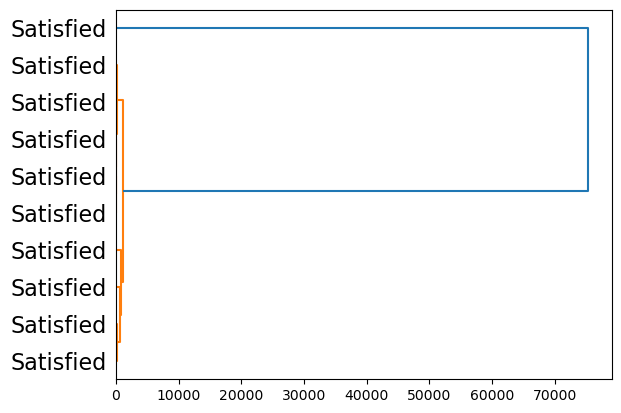

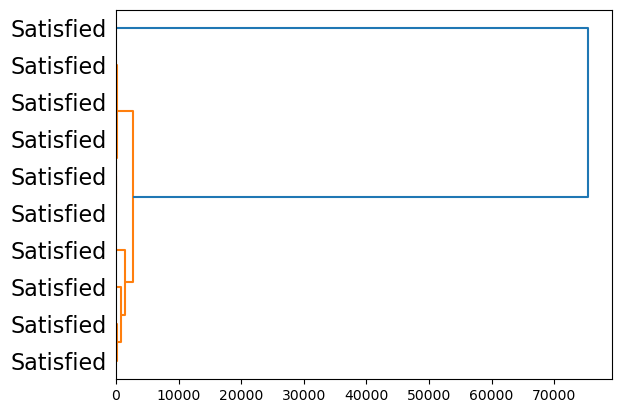

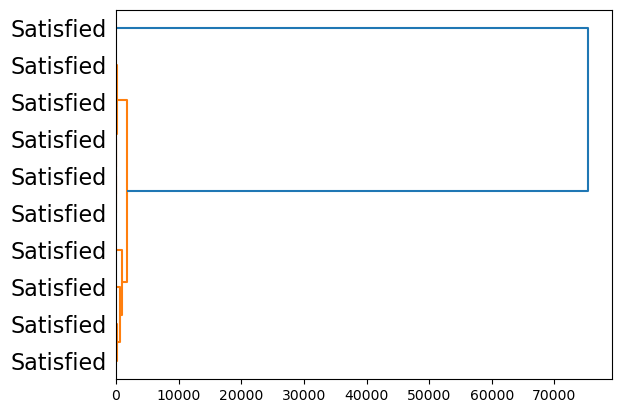

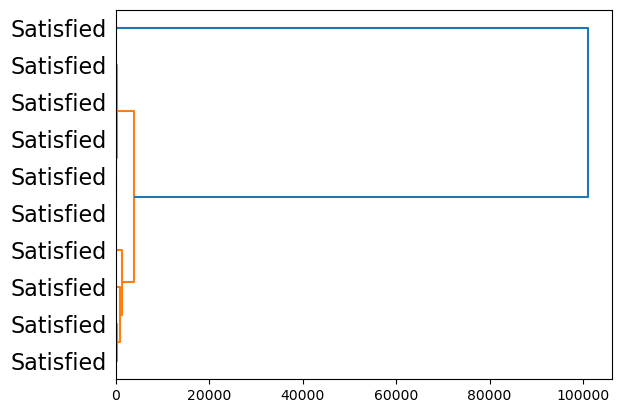

In [50]:
labelList = list(best_categorical_data['Satisfaction'])
dendrogram(
    Z1,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

dendrogram(
    Z3,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

dendrogram(
    Z4,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

# FUZZY

In [51]:
# Define linguistic variables and terms
dep_arriv = ctrl.Antecedent(np.arange(0, 6, 1), 'Departure and Arrival Time Convenience')
booking = ctrl.Antecedent(np.arange(0, 6, 1), 'Ease of Online Booking')
check_in = ctrl.Antecedent(np.arange(0, 6, 1), 'Check-in Service')
online_boarding = ctrl.Antecedent(np.arange(0, 6, 1), 'Online Boarding')
gate = ctrl.Antecedent(np.arange(0, 6, 1), 'Gate Location')
on_board = ctrl.Antecedent(np.arange(0, 6, 1), 'On-board Service')
seat_comfort = ctrl.Antecedent(np.arange(0, 6, 1), 'Seat Comfort')
leg_room = ctrl.Antecedent(np.arange(0, 6, 1), 'Leg Room Service')
cleanliness = ctrl.Antecedent(np.arange(0, 6, 1), 'Cleanliness')
food_drink = ctrl.Antecedent(np.arange(0, 6, 1), 'Food and Drink')
in_flight = ctrl.Antecedent(np.arange(0, 6, 1), 'In-flight Service')
in_flight_wifi = ctrl.Antecedent(np.arange(0, 6, 1), 'In-flight Wifi Service')
in_flight_ent = ctrl.Antecedent(np.arange(0, 6, 1), 'In-flight Entertainment')
bag = ctrl.Antecedent(np.arange(0, 6, 1), 'Baggage Handling')

#output
satisfaction = ctrl.Consequent(np.arange(0, 6, 1), 'satisfaction')


In [52]:
# Define membership functions
dep_arriv['low'] = fuzz.trimf(dep_arriv.universe, [0, 0, 2])
dep_arriv['medium'] = fuzz.trimf(dep_arriv.universe, [1, 2, 4])
dep_arriv['high'] = fuzz.trimf(dep_arriv.universe, [3, 4, 5])

booking['low'] = fuzz.trimf(booking.universe, [0, 0, 2])
booking['medium'] = fuzz.trimf(booking.universe, [1, 2, 4])
booking['high'] = fuzz.trimf(booking.universe, [3, 4, 5])

check_in['low'] = fuzz.trimf(check_in.universe, [0, 0, 2])
check_in['medium'] = fuzz.trimf(check_in.universe, [1, 2, 4])
check_in['high'] = fuzz.trimf(check_in.universe, [3, 4, 5])

online_boarding['low'] = fuzz.trimf(online_boarding.universe, [0, 0, 2])
online_boarding['medium'] = fuzz.trimf(online_boarding.universe, [1, 2, 4])
online_boarding['high'] = fuzz.trimf(online_boarding.universe, [3, 4, 5])

gate['low'] = fuzz.trimf(gate.universe, [0, 0, 2])
gate['medium'] = fuzz.trimf(gate.universe, [1, 2, 4])
gate['high'] = fuzz.trimf(gate.universe, [3, 4, 5])

on_board['low'] = fuzz.trimf(on_board.universe, [0, 0, 2])
on_board['medium'] = fuzz.trimf(on_board.universe, [1, 2, 4])
on_board['high'] = fuzz.trimf(on_board.universe, [3, 4, 5])

seat_comfort['low'] = fuzz.trimf(seat_comfort.universe, [0, 0, 2])
seat_comfort['medium'] = fuzz.trimf(seat_comfort.universe, [1, 2, 4])
seat_comfort['high'] = fuzz.trimf(seat_comfort.universe, [3, 4, 5])

leg_room['low'] = fuzz.trimf(leg_room.universe, [0, 0, 2])
leg_room['medium'] = fuzz.trimf(leg_room.universe, [1, 2, 4])
leg_room['high'] = fuzz.trimf(leg_room.universe, [3, 4, 5])

cleanliness['low'] = fuzz.trimf(cleanliness.universe, [0, 0, 2])
cleanliness['medium'] = fuzz.trimf(cleanliness.universe, [1, 2, 4])
cleanliness['high'] = fuzz.trimf(cleanliness.universe, [3, 4, 5])

food_drink['low'] = fuzz.trimf(food_drink.universe, [0, 0, 2])
food_drink['medium'] = fuzz.trimf(food_drink.universe, [1, 2, 4])
food_drink['high'] = fuzz.trimf(food_drink.universe, [3, 4, 5])

in_flight['low'] = fuzz.trimf(in_flight.universe, [0, 0, 2])
in_flight['medium'] = fuzz.trimf(in_flight.universe, [1, 2, 4])
in_flight['high'] = fuzz.trimf(in_flight.universe, [3, 4, 5])

in_flight_wifi['low'] = fuzz.trimf(in_flight_wifi.universe, [0, 0, 2])
in_flight_wifi['medium'] = fuzz.trimf(in_flight_wifi.universe, [1, 2, 4])
in_flight_wifi['high'] = fuzz.trimf(in_flight_wifi.universe, [3, 4, 5])

in_flight_ent['low'] = fuzz.trimf(in_flight_ent.universe, [0, 0, 2])
in_flight_ent['medium'] = fuzz.trimf(in_flight_ent.universe, [1, 2, 4])
in_flight_ent['high'] = fuzz.trimf(in_flight_ent.universe, [3, 4, 5])

bag['low'] = fuzz.trimf(bag.universe, [0, 0, 2])
bag['medium'] = fuzz.trimf(bag.universe, [1, 2, 4])
bag['high'] = fuzz.trimf(bag.universe, [3, 4, 5])

satisfaction['low'] = fuzz.trimf(satisfaction.universe, [0, 0, 2])
satisfaction['medium'] = fuzz.trimf(satisfaction.universe, [1, 2, 4])
satisfaction['high'] = fuzz.trimf(satisfaction.universe, [3, 4, 5])


In [53]:
# Define fuzzy rules
rule1 =ctrl.Rule(dep_arriv['low'] | booking['low'] | check_in['low'] | online_boarding['low'] |
gate['low'] | on_board['low'] | seat_comfort['low']  | leg_room['low']  |
cleanliness['low']  | food_drink['low']  | in_flight['low'] 
| in_flight_wifi['low']  | in_flight_ent['low']  | bag['low'] 
          , satisfaction['low'])

rule2 = ctrl.Rule(dep_arriv['medium'] | booking['medium'] | check_in['medium'] | online_boarding['medium'] |
gate['medium'] | on_board['medium'] | seat_comfort['medium']  | leg_room['medium']  | 
cleanliness['medium']  | food_drink['medium']  | in_flight['medium'] 
| in_flight_wifi['medium']  | in_flight_ent['medium']  | bag['medium']
          , satisfaction['medium'])

rule3 = ctrl.Rule(dep_arriv['high'] | booking['high'] | check_in['high'] | online_boarding['high'] |
gate['high'] | on_board['high'] | seat_comfort['high']  | leg_room['high']  | 
cleanliness['high']  | food_drink['high']  | in_flight['high'] 
| in_flight_wifi['high']  | in_flight_ent['high']  | bag['high']
          , satisfaction['high'])



# Create a fuzzy control system
satisfaction_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
satisfaction_level = ctrl.ControlSystemSimulation(satisfaction_ctrl)

****************************************
Customer  0  = 
Satisfaction Level of customer  2.487179487179487
****************************************
Customer  1  = 
Satisfaction Level of customer  2.5757575757575752
****************************************
Customer  2  = 
Satisfaction Level of customer  3.1470588235294117
****************************************
Customer  3  = 
Satisfaction Level of customer  2.5757575757575752
****************************************
Customer  4  = 
Satisfaction Level of customer  1.6666666666666665
****************************************
Customer  5  = 
Satisfaction Level of customer  1.8148148148148147
****************************************
Customer  6  = 
Satisfaction Level of customer  2.388888888888889
****************************************
Customer  7  = 
Satisfaction Level of customer  2.487179487179487
****************************************
Customer  8  = 
Satisfaction Level of customer  2.5757575757575752
*******************************

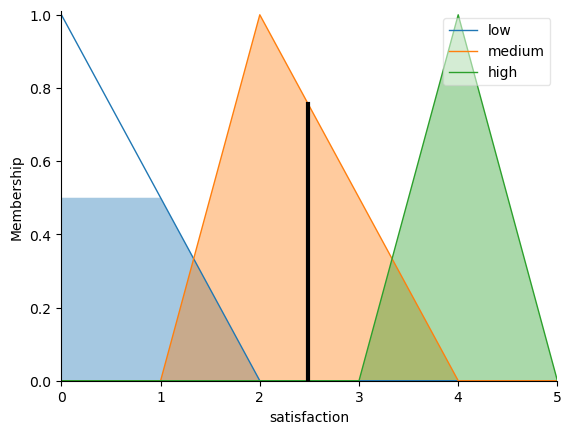

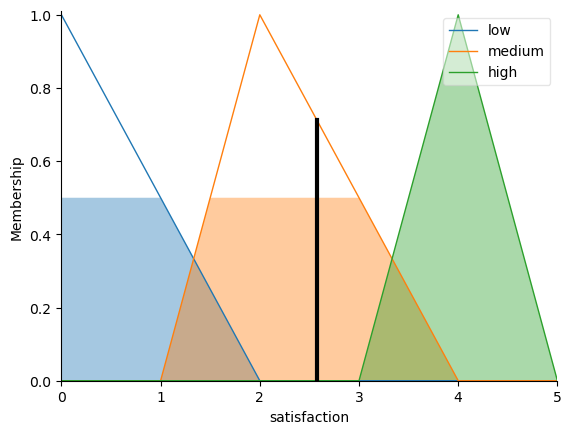

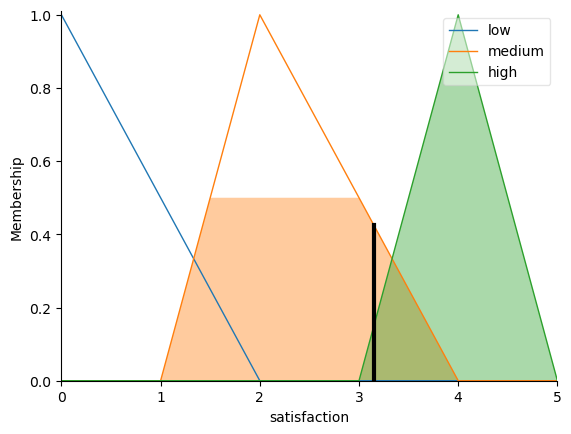

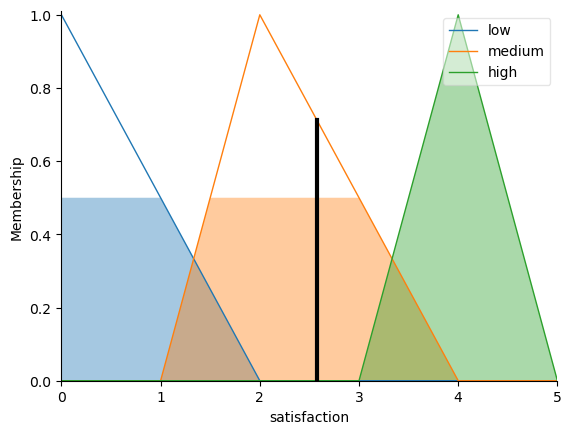

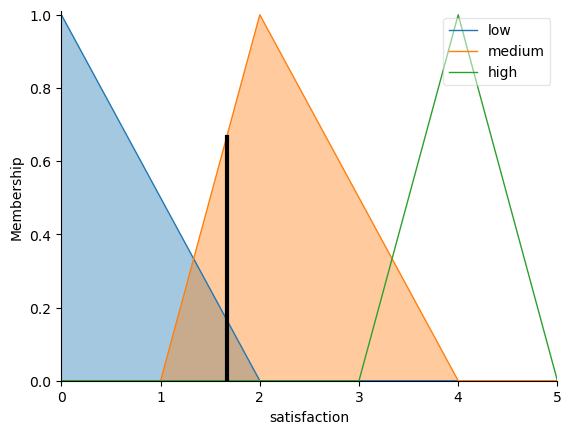

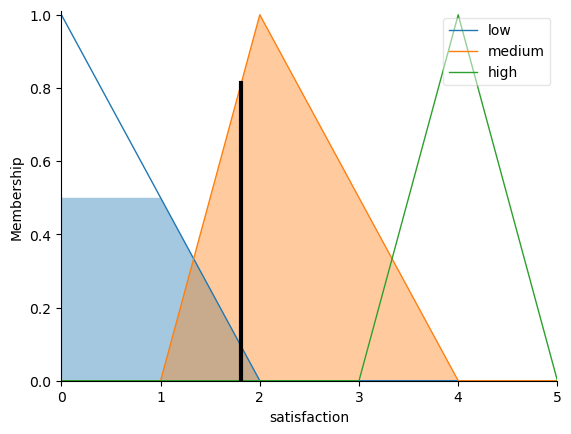

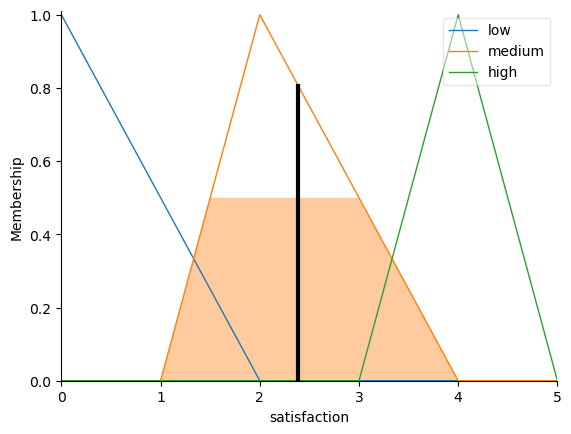

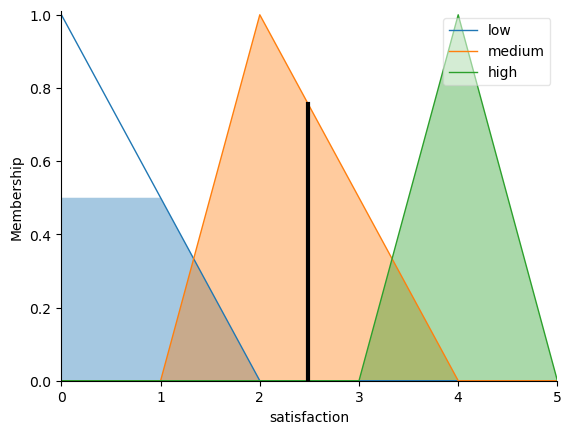

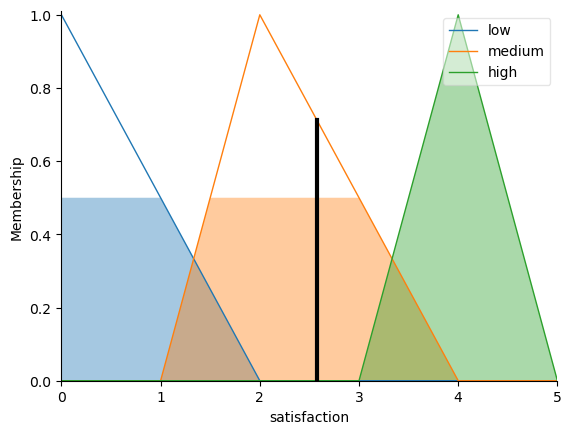

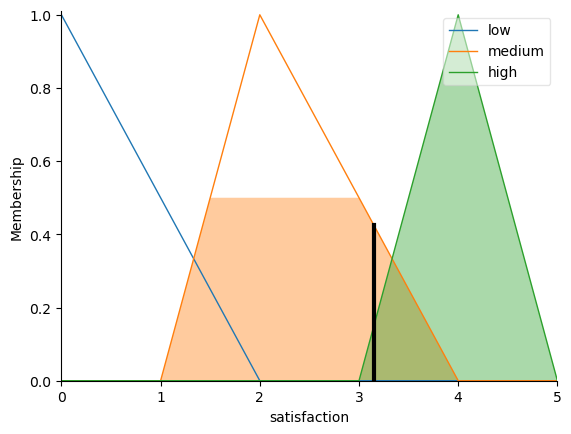

In [62]:
input_types=['Departure and Arrival Time Convenience', 'Ease of Online Booking',
        'Check-in Service', 'Online Boarding', 'Gate Location',
        'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
        'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
        'In-flight Entertainment', 'Baggage Handling']
for j in range (10): #iterate over 10 rows
    print("*"*40)
    print('Customer ',j," = ")
    for i, types in zip(range(14), input_types): #iterate over columns
        input=best_numerical_data[input_types].iloc[j].iloc[i]
        satisfaction_level.input[types]=input
    satisfaction.view(satisfaction_level)
        
    # Compute satisfaction level
    satisfaction_level.compute()

    # Output satisfaction level
    print("Satisfaction Level of customer ",satisfaction_level.output['satisfaction'])
     


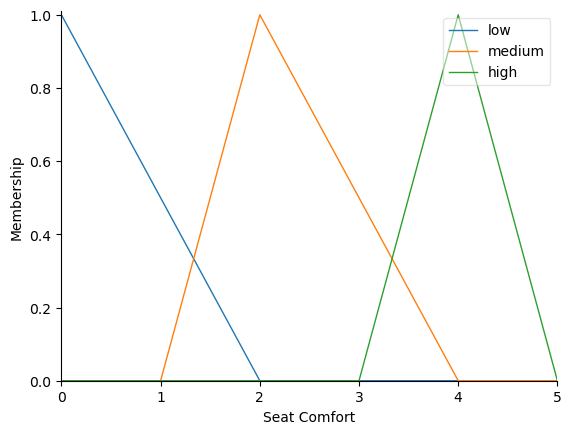

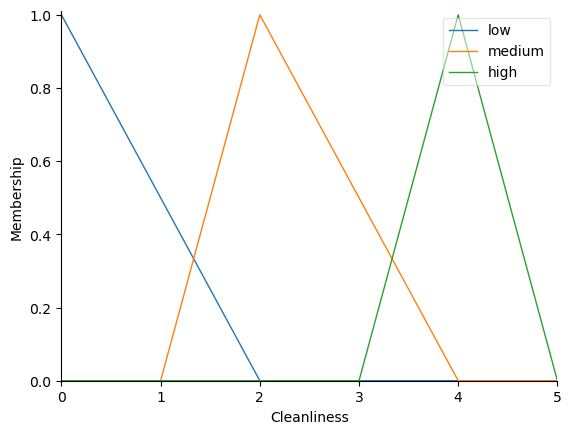

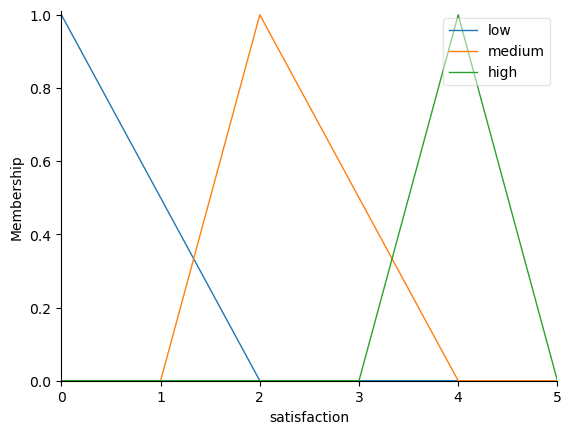

In [55]:
seat_comfort.view()
cleanliness.view()
satisfaction.view()

# K-Means (Bonus)

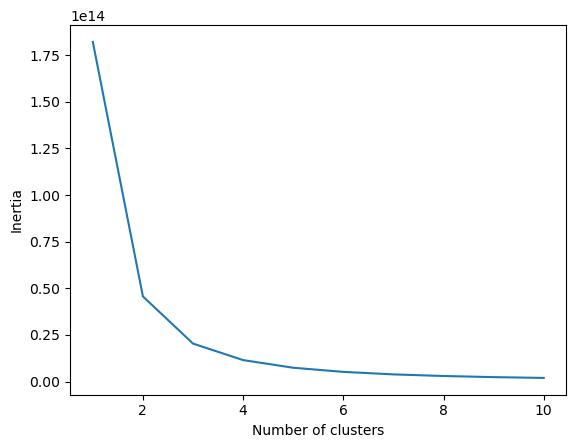

In [63]:
from sklearn.cluster import KMeans
inertia = [] # tightness of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[numerical_cols]) #standard data
    inertia.append(kmeans.inertia_)

# Plot elbow curve to visualize the optimal k
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From the curve, choose the optimal k value 
#(the point where the inertia starts)
#from k=2 till k=4


In [57]:
# Perform K-means clustering with the chosen k value
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data[numerical_cols])

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Print the cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_cols) # return to normal value (not standard)
print("Cluster Centroids:")
print(centroids)

# Print the counts of data points in each cluster
print("Counts per Cluster:")
print(data['Cluster'].value_counts())

Cluster Centroids:
              ID        Age  Flight Distance  Departure Delay  Arrival Delay  \
0   21571.099183  38.882599      1046.813127        15.514111      16.905121   
1  108156.809130  39.865999      1236.448509        14.933946      14.445186   
2   64799.071425  39.533675      1286.555468        13.485062      13.933600   

   Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                3.060794                2.730183   
1                                3.053314                2.770356   
2                                3.057969                2.769651   

   Check-in Service  Online Boarding  Gate Location  On-board Service  \
0          3.163002         3.149927       2.978967          3.278007   
1          3.423791         3.341488       2.975974          3.465080   
2          3.330863         3.265969       2.975798          3.405762   

   Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0      3.346153         

# Logistic Regression (Bonus)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Assuming 'data' contains both features and target variable
X = data[numerical_cols]  # Features
y = data['Satisfaction']   # Target 

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.65      0.72      0.68     21951
              Satisfied       0.57      0.49      0.53     16896

               accuracy                           0.62     38847
              macro avg       0.61      0.60      0.61     38847
           weighted avg       0.62      0.62      0.61     38847

Accuracy: 61.95587818879192 %


Confusion Matrix:
[[15747  6204]
 [ 8575  8321]]


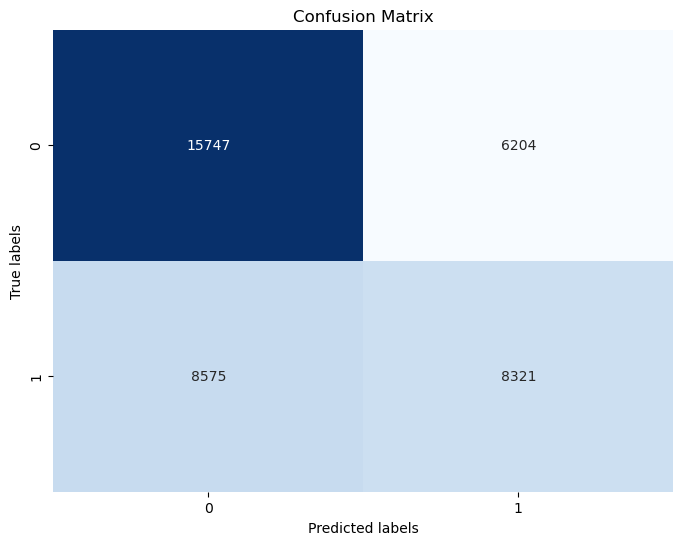

In [59]:
# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree (Bonus)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix

X = data[numerical_cols]  # Features (all columns except the last one)
y = data['Satisfaction']   # Target variable (last column)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating decision tree classifier
dtree = DecisionTreeClassifier()

# Training the classifier
dtree.fit(X_train, y_train)

# Making predictions
y_pred = dtree.predict(X_test)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.93      0.93      0.93     21951
              Satisfied       0.91      0.91      0.91     16896

               accuracy                           0.92     38847
              macro avg       0.92      0.92      0.92     38847
           weighted avg       0.92      0.92      0.92     38847

Accuracy: 92.3237315622828 %


Confusion Matrix:
[[20449  1502]
 [ 1480 15416]]


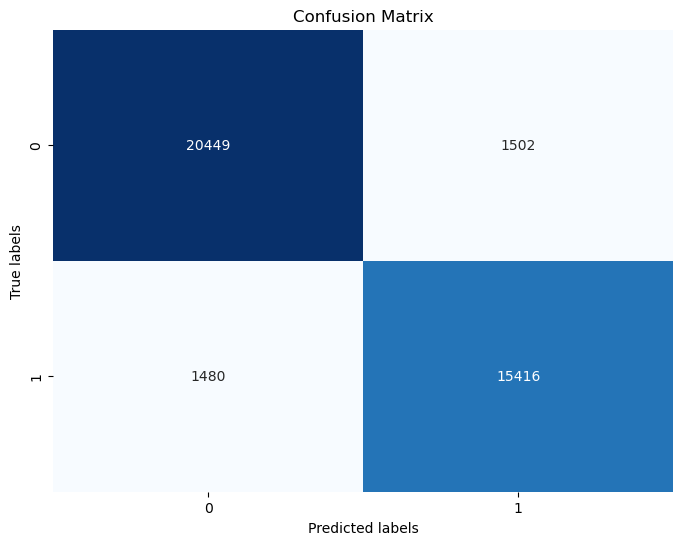

In [61]:
# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()